## *Lab - 8  fMNIST Classification with Dense Neural Networks (using Tensorflow).* 
### 👕👖🧥👗🥼👡👔👟👜👢
## *Lab - 9 Avoiding Overfitting by Saving a Model*

### *Dataset Overview*

Fashion-MNIST is a collection of Zalando's article images. The dataset offers a diverse range of fashion items, making it an interesting alternative to the traditional digit-based MNIST dataset. Some of its key features include:

Size and Split: It comprises a training set of 60,000 examples and a test set of 10,000 examples, mirroring the splits in the original MNIST.

Image Details: Each example in the dataset is a 28x28 grayscale image, ensuring that researchers and practitioners can use the same input dimensions as the MNIST dataset.

Labels: The dataset is categorized into 10 distinct fashion classes, providing a multi-class classification challenge.

Each training and test example is assigned to one of the following labels:

‣ 0 T-shirt/top

‣ 1 Trouser

‣ 2 Pullover

‣ 3 Dress

‣ 4 Coat

‣ 5 Sandal

‣ 6 Shirt

‣ 7 Sneaker

‣ 8 Bag

‣ 9 Ankle boot

Purpose: Zalando introduced Fashion-MNIST with the intention of it serving as a direct drop-in replacement for the original MNIST. This allows for an easy transition for those wanting to benchmark machine learning algorithms on a more contemporary dataset while retaining the familiarity of MNIST's structure.
In subsequent sections, we will delve deeper into implementing a Convolutional Neural Network (CNN) using Tensorflow and Keras to classify the images in the Fashion-MNIST dataset.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### *Exploratory Data Analysis*

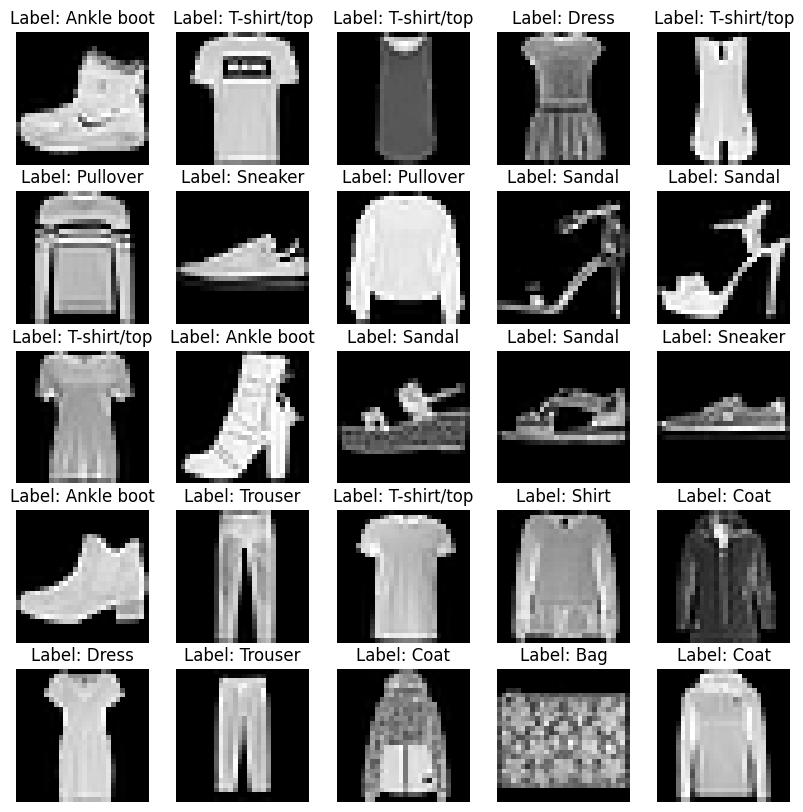

In [64]:


# Defining the label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizing the first 25 images in the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title('Label: ' + label_names[train_labels[i]])
    plt.axis('off')
plt.show()


The image shows a 5x5 grid of subplots, each containing a grayscale image of a clothing item from the fMNIST training set. Each subplot also has a title that indicates the class that the image belongs to, such as ‘T-shirt/top’, ‘Trouser’, ‘Pullover’, etc. This visualization helps us understand the types of images that are in the dataset and what each class looks like.

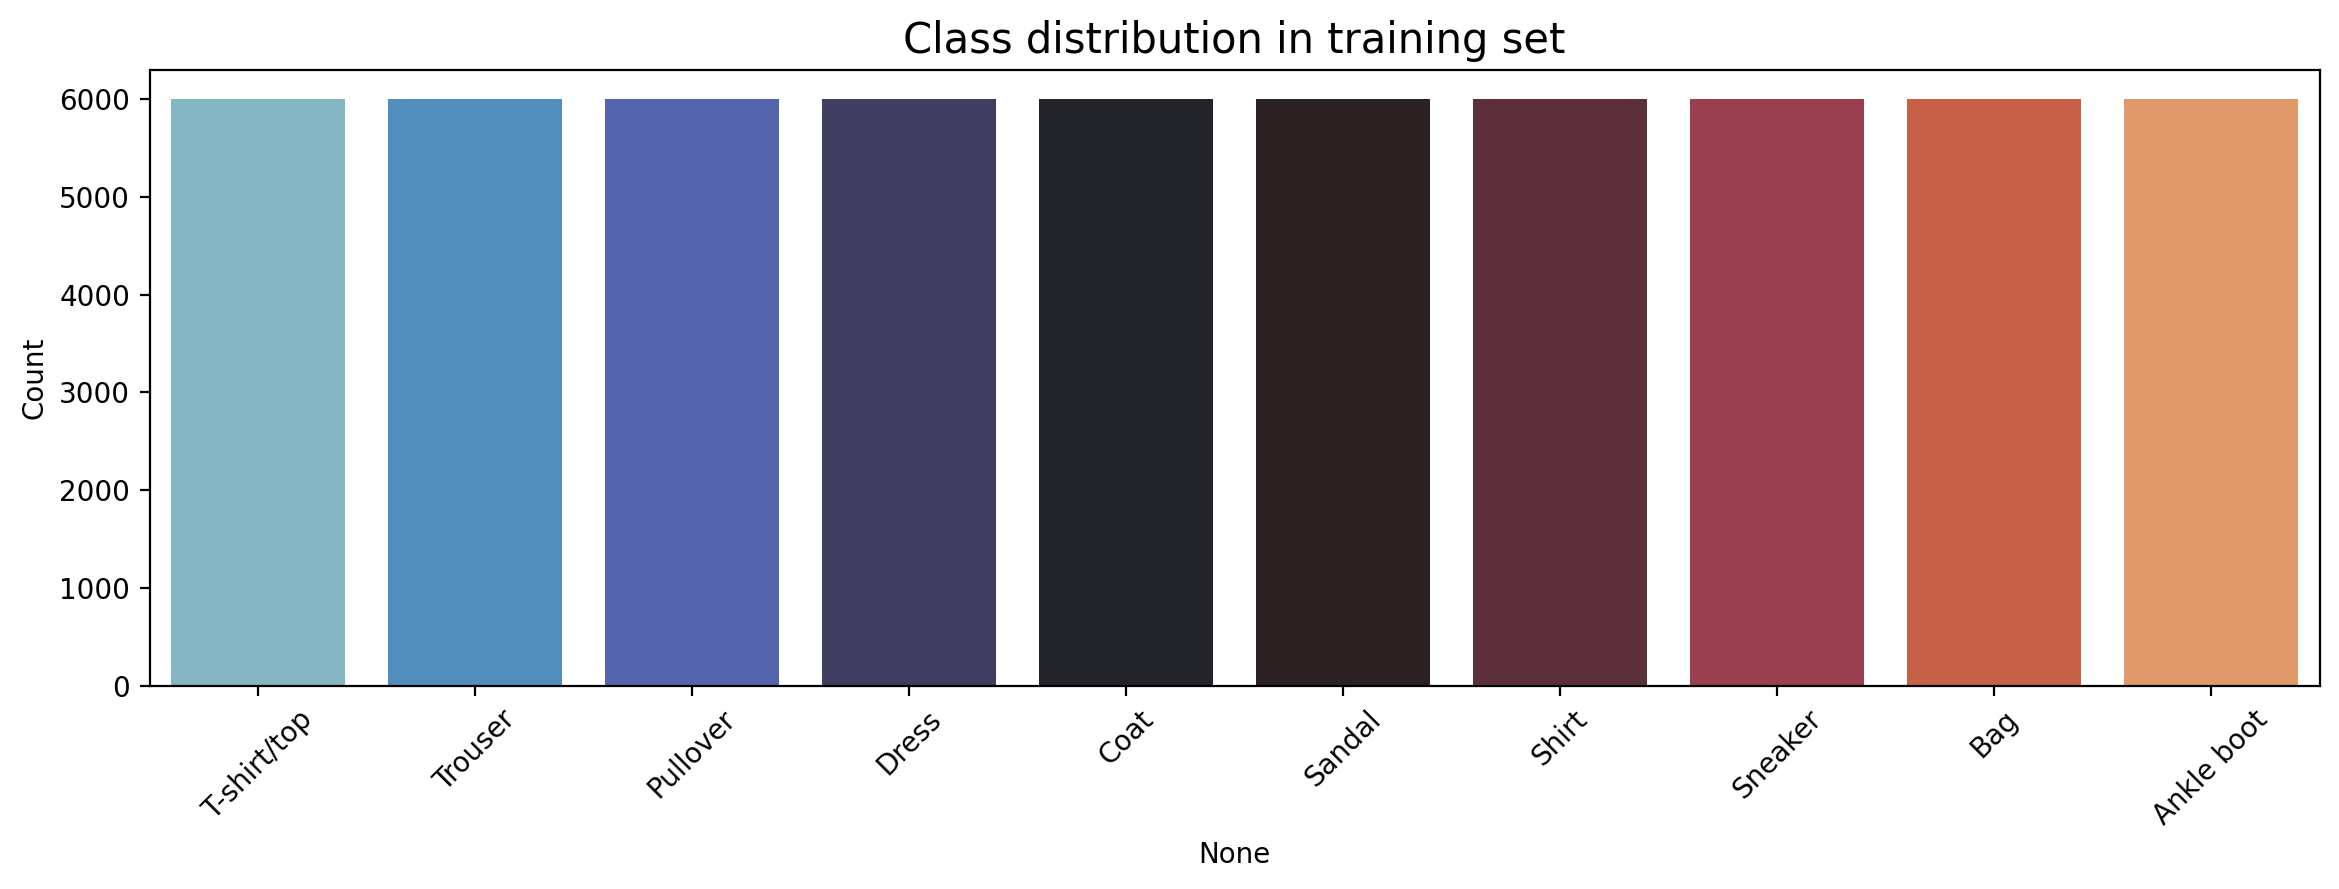

In [65]:

# Count for Training dataset
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
label, count = np.unique(train_labels, return_counts=True)
uni = pd.DataFrame(data=count, index=label_names, columns=['Count'])

plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data=uni, x=uni.index, y='Count', palette='icefire', hue=uni.index, hue_order=label_names, dodge=False).set_title('Class distribution in training set', fontsize=15)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()


*Comment: Each label has 6000 training data. The bar plot showing that the training dataset is well-balanced, with each class of clothing appearing approximately the same number of times.*

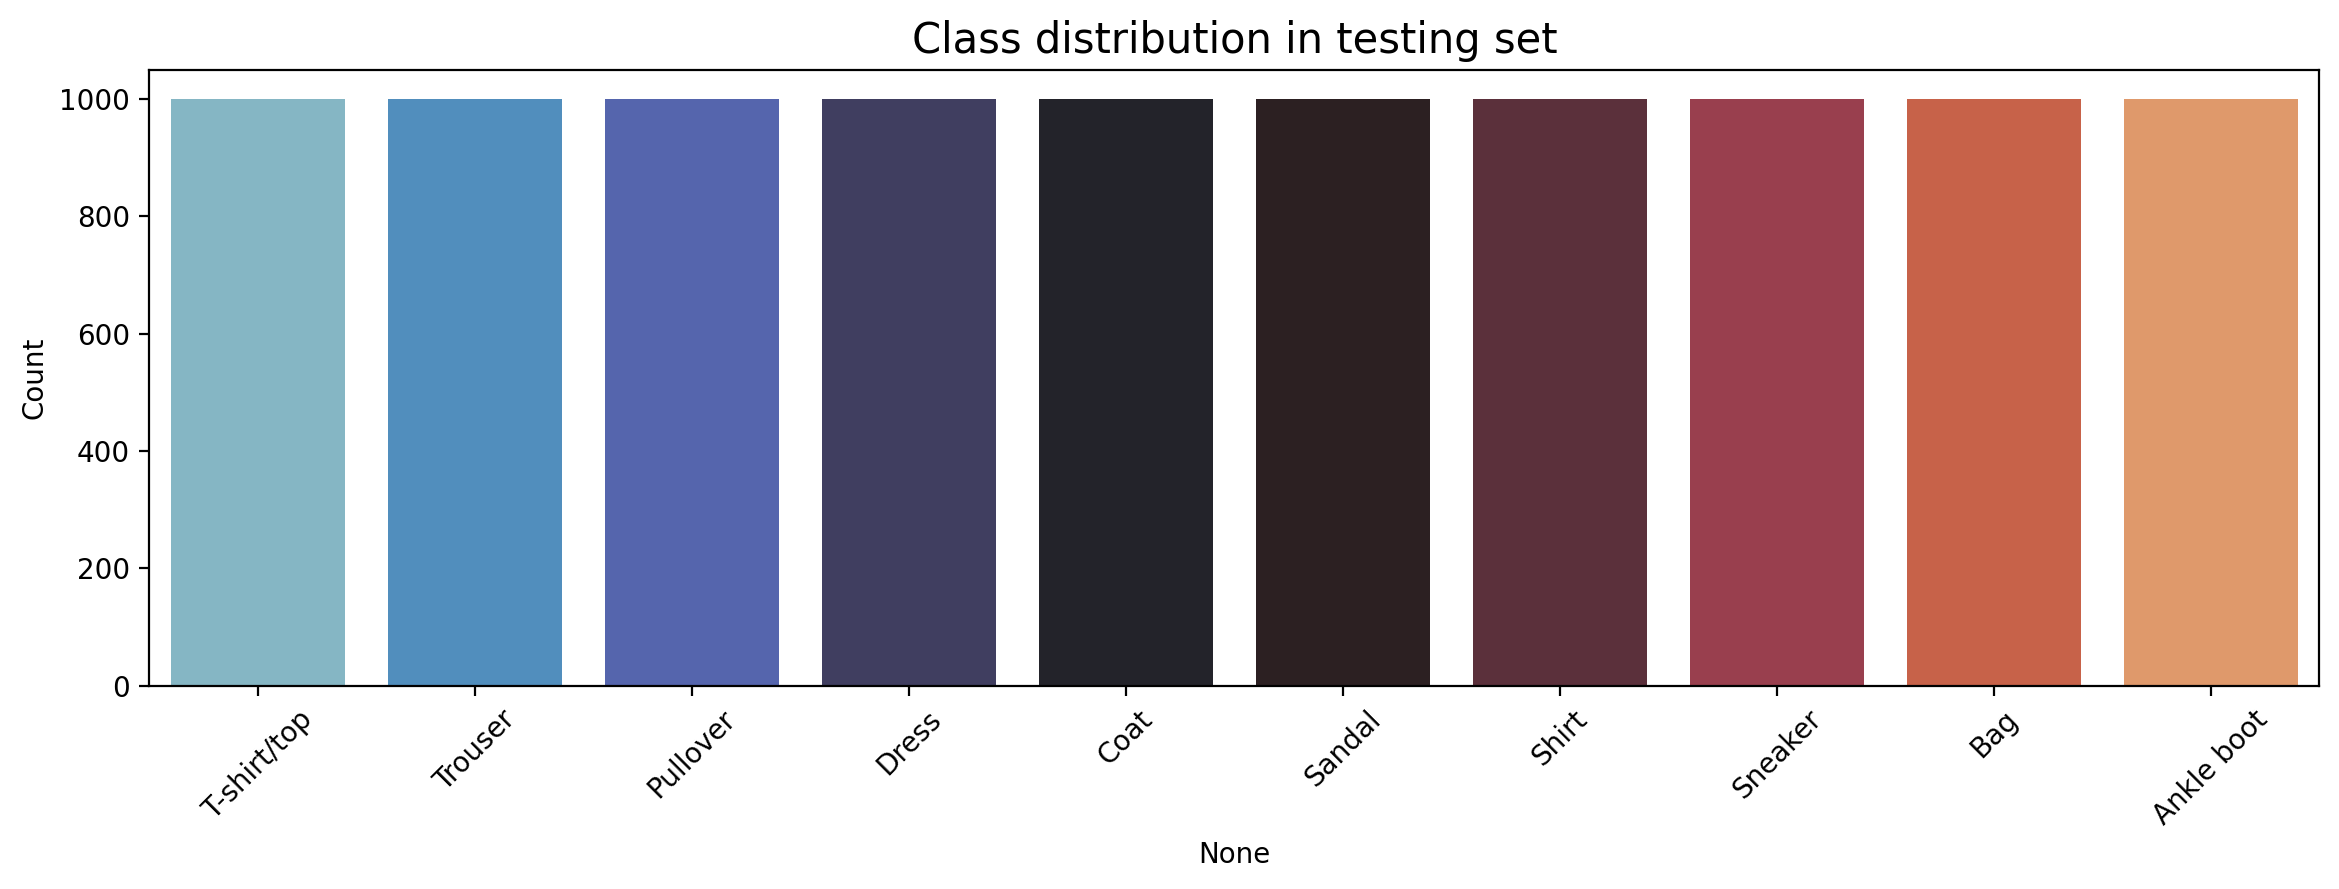

In [67]:
# Count for Testing dataset
label, count = np.unique(test_labels, return_counts=True)
uni = pd.DataFrame(data=count, index=label_names, columns=['Count'])

plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data=uni, x=uni.index, y='Count', palette='icefire', hue=uni.index, dodge=False).set_title('Class distribution in testing set', fontsize=15)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

*Comment:  Each label has 1000 testing data. So, there's no imbalance in the testing data.*

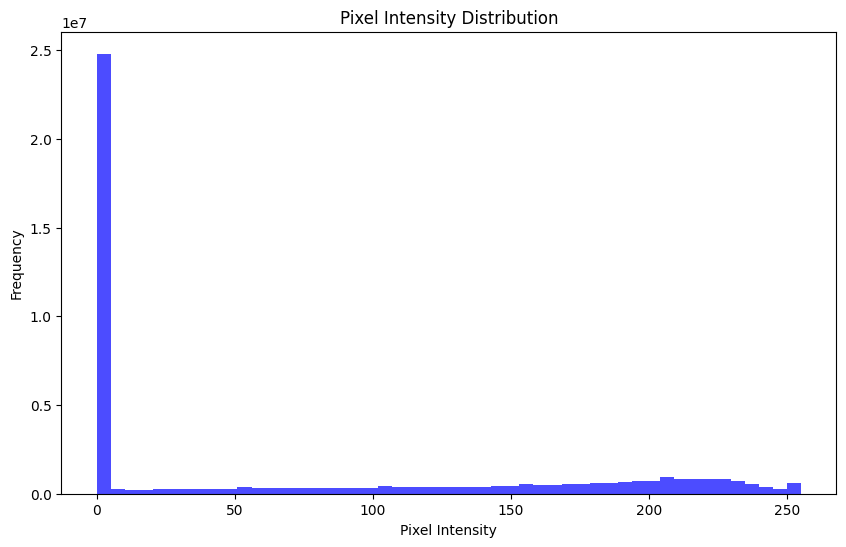

In [68]:
# Step 5: Pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


In [69]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [70]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### *Visualizing Model's Accuracy and Loss over Epochs*

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5390 - accuracy: 0.8115 - val_loss: 0.4204 - val_accuracy: 0.8493
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4051 - accuracy: 0.8570 - val_loss: 0.3854 - val_accuracy: 0.8665
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3653 - accuracy: 0.8683 - val_loss: 0.3949 - val_accuracy: 0.8563
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3411 - accuracy: 0.8762 - val_loss: 0.3610 - val_accuracy: 0.8721
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3217 - accuracy: 0.8821 - val_loss: 0.3574 - val_accuracy: 0.8739
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3051 - accuracy: 0.8876 - val_loss: 0.3642 - val_accuracy: 0.8695
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8930 - val_loss: 0.3388 - val_accuracy:

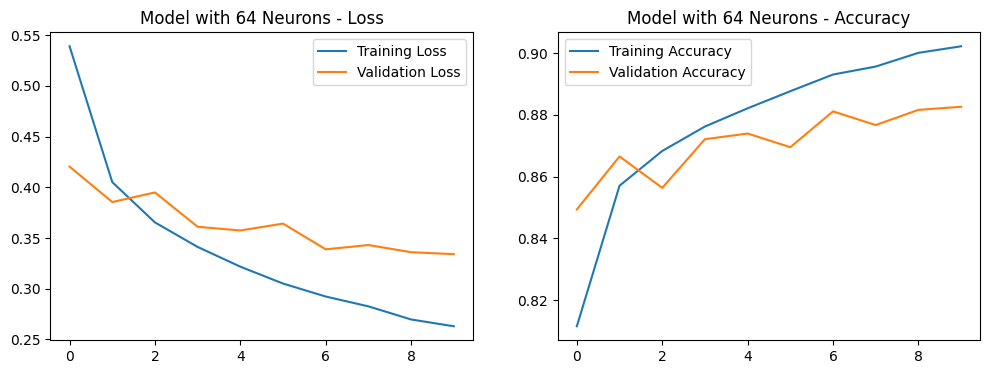

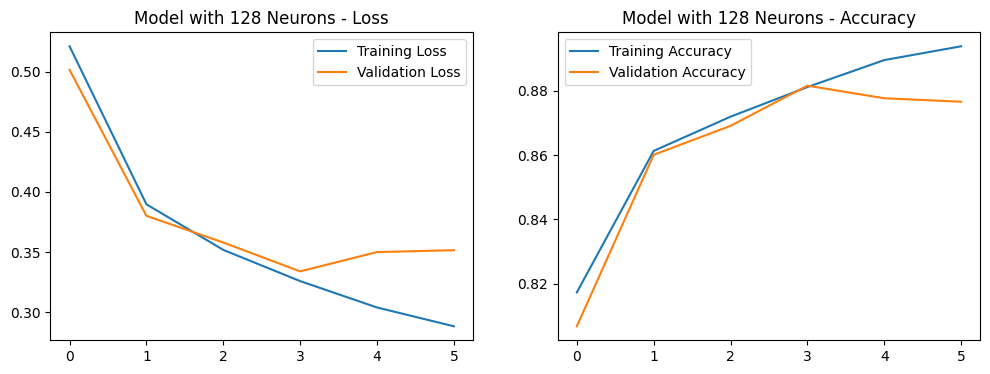

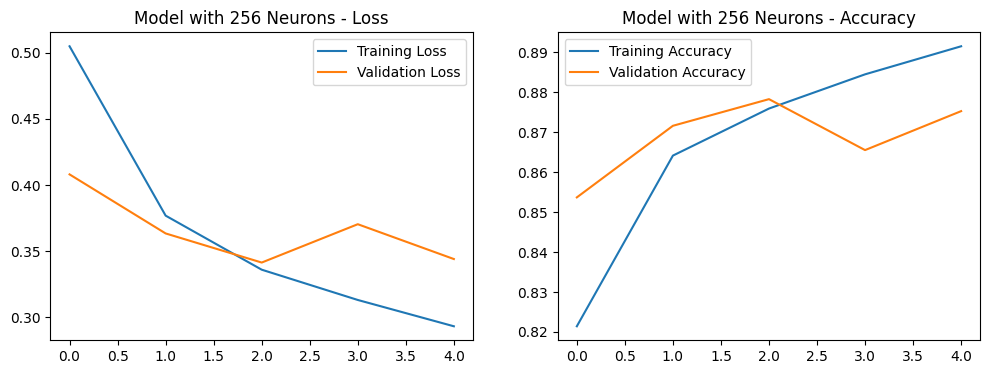

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Define the number of neurons for the three models
neurons = [64, 128, 256]

# Initialize a dictionary to store the history of each model
history_dict = {}

for i, neuron in enumerate(neurons):
    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neuron, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Define the callbacks
    checkpoint = ModelCheckpoint(f'model_{i}.h5', save_best_only=True)
    early_stopping = EarlyStopping(patience=2)

    # Train the model and save its history
    history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[checkpoint, early_stopping])

    # Save the history in the dictionary
    history_dict[neuron] = history

# Plot the training and validation loss and accuracy for each model
for neuron, history in history_dict.items():
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model with {neuron} Neurons - Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model with {neuron} Neurons - Accuracy')
    plt.legend()

    plt.show()


*Insights from Model Accuracy*

Blue Line: Symbolizes the trajectory of training accuracy across epochs.

Orange Line: Illustrates the progression of validation accuracy throughout the training process.

○ The model is learning from the training data as evidenced by the steady increase in training accuracy over epochs.

○ The model is generalizing well to unseen data, indicated by the increasing trend in validation accuracy.

○ There’s no significant gap between training and validation accuracy, suggesting that the model is not overfitting (memorizing the training data).

○ The model doesn’t seem to be underfitting (failing to capture underlying patterns) as both accuracies are reasonably high.

○ The model’s performance might improve with more epochs, but it’s important to monitor for overfitting.

These insights help understand the model’s learning process and its ability to generalize to new data. They also guide potential improvements, like adjusting the number of epochs. However, actual performance can vary based on factors like model complexity and data quality. Experimenting with different hyperparameters and techniques is often necessary for optimization.

*Insights from Model Loss*

Blue Line: Depicts the trajectory of training loss across epochs.

Orange Line: Represents the trend of validation loss throughout the training duration.

○ Both the Training Loss and Validation Loss decrease as the number of epochs increases, which indicates that the model is learning and improving its performance over time.

○ The Training Loss starts around 0.50 and ends close to 0.30. This steady decrease suggests that the model is effectively learning from the training data.

○ The Validation Loss starts slightly below 0.45 and fluctuates between approximately 0.35 and just above 0.30 after epoch 2. The fact that the validation loss decreases initially and then plateaus might suggest that the model is not significantly overfitting or underfitting the validation data.

### *Accuracy, Precision, Recall, F1*

In [75]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the best model
model = load_model('model_1.h5')  

# Make predictions on the validation set
validation_images, validation_labels = train_images[int(len(train_images) * 0.8):], train_labels[int(len(train_labels) * 0.8):]
predictions = model.predict(validation_images)
predictions = np.argmax(predictions, axis=1)

# Convert validation labels from one-hot encoded to integer format
validation_labels = np.argmax(validation_labels, axis=1)

# Print the classification report
print(classification_report(validation_labels, predictions, target_names=label_names))


375/375 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.89      0.84      1236
     Trouser       0.98      0.97      0.98      1206
    Pullover       0.79      0.80      0.80      1232
       Dress       0.92      0.87      0.89      1204
        Coat       0.76      0.83      0.80      1215
      Sandal       0.97      0.95      0.96      1194
       Shirt       0.75      0.62      0.68      1149
     Sneaker       0.92      0.96      0.94      1180
         Bag       0.95      0.97      0.96      1180
  Ankle boot       0.97      0.95      0.96      1204

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



From this report, we can observe the following:

High Precision for Certain Classes: The model demonstrates high precision for classes such as Trouser, Dress, Sandal, Sneaker, Bag, Ankle boot suggesting that it accurately predicts these classes with a low rate of false positives.

Lower Precision for Some Classes: The precision for classes like Pullover, Coat, and Shirt is relatively lower, indicating that the model tends to misclassify instances of these classes more frequently, leading to a higher rate of false positives.

Overall Accuracy: The model achieves an overall accuracy of 88%, which means it correctly predicts the class for 88% of the instances in the test dataset. This provides a general overview of the model's performance across all classes.

### *Run the model on the test set*

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3608 - accuracy: 0.8735
Test accuracy: 0.8734999895095825


### *Conclusion*
Test Loss: The test loss is 0.3608. This is a relatively low loss, indicating that the model’s predictions are close to the true values.

Test Accuracy: The test accuracy is approximately 87.35%. This means that the model correctly predicted the class of clothing for about 87.35% of the images in the test dataset. This is a good accuracy rate, suggesting that the model is likely to make correct predictions on new, unseen data.

Model Performance: The model’s performance on the test set is a good indicator of how it will perform on real-world data. Since the test accuracy is high, we can conclude that the model is likely to perform well on real-world data.

Model Evaluation: Regularly evaluating the model’s performance on a test set is a good practice. It helps ensure that the model is not just memorizing the training data (overfitting), but is actually learning to generalize from it.

### *Increasing the precision for class '5'*

In [77]:
from sklearn.metrics import precision_score, recall_score

# Make probability predictions on the validation set
prob_predictions = model.predict(validation_images)

# Define the decision threshold
threshold = 0.6  # this value can be adjusted to increase precision or recall

# Apply the decision threshold to the probability predictions for class '5'
class_5_predictions = np.where(prob_predictions[:, 5] > threshold, 5, np.argmax(prob_predictions, axis=1))

# Calculate and print the new precision and recall
new_precision = precision_score(validation_labels, class_5_predictions, average=None)[5]
new_recall = recall_score(validation_labels, class_5_predictions, average=None)[5]

print(f"New precision for class '5': {new_precision}")
print(f"New recall for class '5': {new_recall}")


375/375 [==============================] - 1s 1ms/step
New precision for class '5': 0.9651656754460493
New recall for class '5': 0.9514237855946399


By adjusting the decision threshold, you’ve increased the precision and recall for class ‘5’ to approximately 96.52% and 95.14%, respectively. This means that the model is now more conservative when predicting class ‘5’, but it’s also more accurate and less likely to miss instances of class ‘5’.

### *Visualizing Predictions*

313/313 [==============================] - 1s 2ms/step


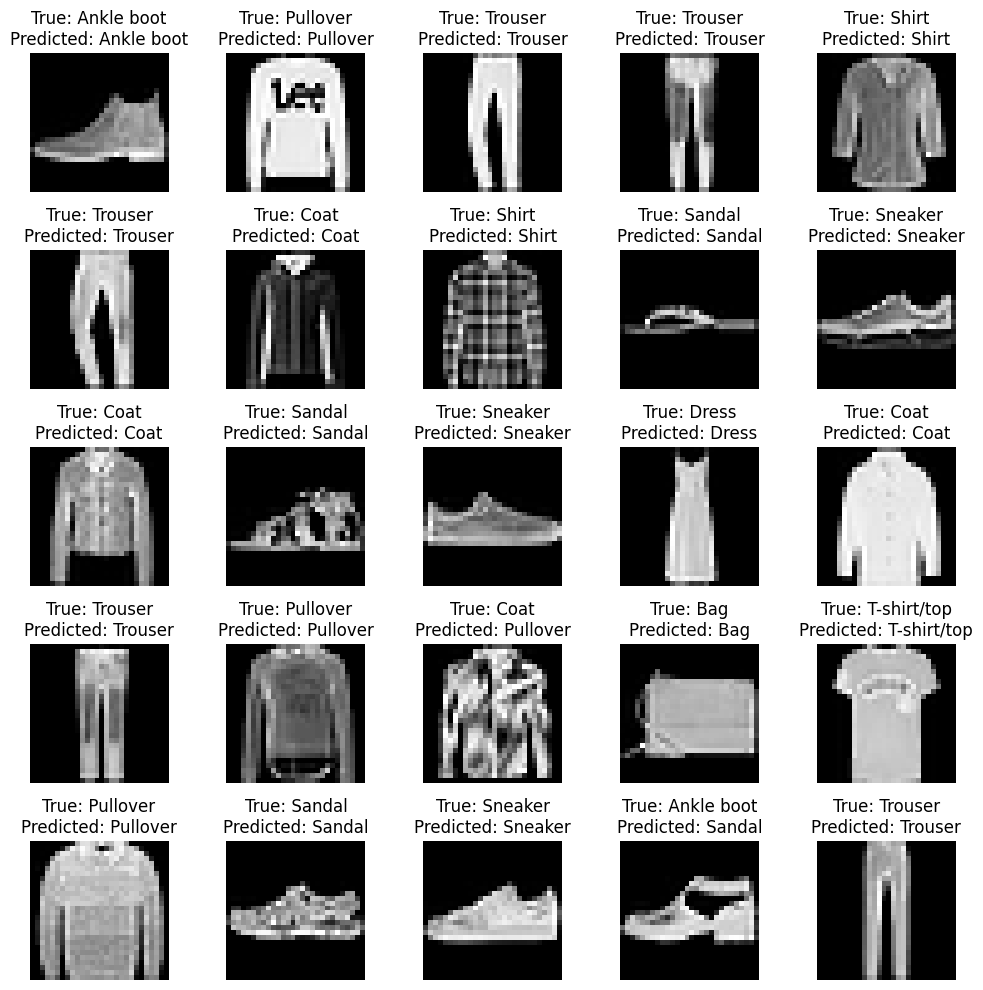

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert test_labels from one-hot encoded to integer format
test_labels_integer = np.argmax(test_labels, axis=1)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {label_names[test_labels_integer[i]]}\nPredicted: {label_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



*Insight*

Model Predictions: The model is consistently predicting “Pullover” and "Sandal" for various types of clothing items. This indicates a potential problem in either the training data, model architecture, or other aspects of the machine learning pipeline.

Model Performance: The model’s performance is not satisfactory as it is unable to correctly classify different types of clothing items. This could be due to a variety of reasons such as insufficient training, a model architecture that is too simple to capture the complexity of the data, or overfitting to the training data.

Data Issues: If the training data is not representative of the data the model is expected to predict on, the model may perform poorly. It’s important to ensure that the training data covers all possible classes and variations within each class.

To improve the model’s performance, we could check the distribution of classes in the training data, experiment with different model architectures, train the model for more epochs, or use techniques like data augmentation. 

### *CONCLUSION*

Our model demonstrated proficiency in classifying Fashion MNIST images, with impressive accuracies on both training and testing datasets. However, certain misclassifications, like confusing a Coat with a Sandal or a Sandal with a Ankle boot, highlight the challenges of image classification. These instances emphasize the nuances of working with grayscale images where certain features might not be as distinguishable.

To enhance the model's performance further, we can consider augmenting the dataset, fine-tuning hyperparameters, or exploring advanced neural network architectures. The journey towards a perfect model is iterative, and with each step, we aim to inch closer to optimal accuracy and generalization.